In [2]:
import pandas as pd

In [30]:
filepath = 'matthew/Results/JobNoOccupyresults.csv'
filepath = 'matthew/Results/Matthewresults.csv'
# filepath = 'matthew/Results/Simpleresults.csv'
# filepath = 'Results/Jobresults.csv'
# filepath = 'Results/Matthewresults.csv'
# filepath = 'Results/WarmStartresults.csv'
filepath = "NewTorch/Results/WarmStartTestFixedMultiHeadresults.csv"

df = pd.read_csv(filepath)
df.sort_values(by='learning_beta', inplace=True)

# Check that the split column has all same values
df.simple_obs
simple_obs = df['simple_obs']
assert len(set(simple_obs)) == 1, "Multiple values in simple_obs column"


In [31]:
util_var = 'system_utility' if 'system_utility' in df.columns else 'utility'
important_columns = ['learning_beta', util_var, 'fairness', 'variance', 'min_utility']

split_df_all = df[(df.split==True) & (df.learn_utility==True) & (df.multi_head==False)][important_columns]
multihead_df_all = df[(df.split==True) & (df.learn_utility==True) & (df.multi_head==True)][important_columns]
splitnoutil_df_all = df[(df.split==True) & (df.learn_utility==False) & (df.multi_head==False)][important_columns]
joint_df_all = df[(df.split==False)][important_columns]

# Aggregate the results by learning_beta. Keep mean and variance of each column
split_df = split_df_all.groupby('learning_beta').agg(['mean', 'std'])
multihead_df = multihead_df_all.groupby('learning_beta').agg(['mean', 'std'])
splitnoutil_df = splitnoutil_df_all.groupby('learning_beta').agg(['mean', 'std'])
joint_df = joint_df_all.groupby('learning_beta').agg(['mean', 'std'])

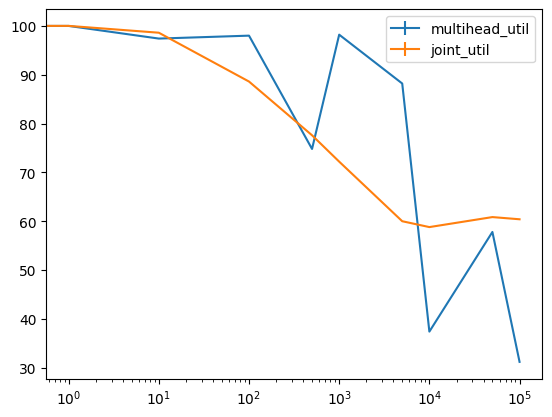

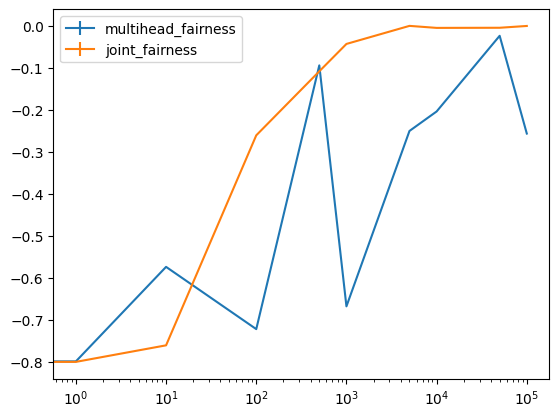

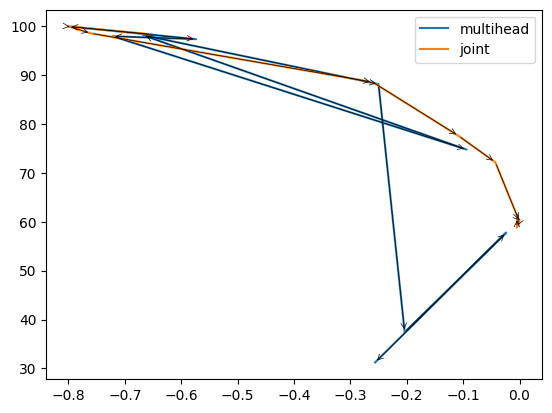

In [45]:
import matplotlib.pyplot as plt
dfs = {
    'split': split_df,
    'multihead': multihead_df,
    'splitnoutil': splitnoutil_df,
    'joint': joint_df
}

for df_name, df in dfs.items():
    if len(df):
        learning_beta = df.index
        mean_util = df[util_var]['mean']
        std_util = df[util_var]['std']
        plt.errorbar(learning_beta, mean_util, yerr=std_util, label=f"{df_name}_util")
        # plt.plot(learning_beta, mean_util, label=f"{df_name}_util")
        
 
plt.xscale('log')
plt.legend()
plt.show()
for df_name, df in dfs.items():
    if len(df):
        learning_beta = df.index
        mean_fairness = df['fairness']['mean']
        std_fairness = df['fairness']['std']
        plt.errorbar(learning_beta, mean_fairness, yerr=std_fairness, label=f"{df_name}_fairness")
        # plt.plot(learning_beta, mean_fairness, label=f"{df_name}_fairness")


plt.xscale('log')
plt.legend()
plt.show()

#Plot pareto front
for df_name, df in dfs.items():
    if len(df):
        learning_beta = df.index
        mean_fairness = df['fairness']['mean']
        mean_util = df[util_var]['mean']
        #Add arrows to show direction of learning
        for i in range(1, len(learning_beta)):
            mean_utils = mean_util.to_numpy()
            mean_fairs = mean_fairness.to_numpy()
            plt.annotate("", xy=(mean_fairs[i], mean_utils[i]), xytext=(mean_fairs[i-1], mean_utils[i-1]),
                         arrowprops=dict(arrowstyle="->", lw=0.5))
        plt.plot(mean_fairness, mean_util, label=f"{df_name}")

plt.legend()
plt.show()



In [5]:
import plotly.express as px
# Sort the dataframes by learning_beta
splitsimple_sorted = splitsimple.sort_values('learning_beta')
splitcomplex_sorted = splitcomplex.sort_values('learning_beta')
simplenoutil_sorted = simplenoutil.sort_values('learning_beta')
complexnoutil_sorted = complexnoutil.sort_values('learning_beta')
jointsimple_sorted = jointsimple.sort_values('learning_beta')
jointcomplex_sorted = jointcomplex.sort_values('learning_beta')


# # Create scatter plots with connected lines
# fig = px.line(splitsimple_sorted, x='utility', y='fairness', title='Split Simple', text='learning_beta')
# fig.show()

# fig = px.line(splitcomplex_sorted, x='utility', y='fairness', title='Split Complex', text='learning_beta')
# fig.show()

# fig = px.line(jointsimple_sorted, x='utility', y='fairness', title='Joint Simple', text='learning_beta')
# fig.show()

# fig = px.line(jointcomplex_sorted, x='utility', y='fairness', title='Joint Complex', text='learning_beta')
# fig.show()

splitsimple_sorted['df_name'] = 'Split Simple'
splitcomplex_sorted['df_name'] = 'Split Complex'
simplenoutil_sorted['df_name'] = 'Simple No Util'
complexnoutil_sorted['df_name'] = 'Complex No Util'
jointsimple_sorted['df_name'] = 'Joint Simple'
jointcomplex_sorted['df_name'] = 'Joint Complex'

# Combine all dataframes into one
combined_df = pd.concat([splitsimple_sorted, splitcomplex_sorted, simplenoutil_sorted, complexnoutil_sorted, jointsimple_sorted, jointcomplex_sorted])

# Plot the lines on a single plot with df name as color
fig = px.line(combined_df, x='system_utility', y='fairness', color='df_name', title='Combined Dataframes', text='learning_beta', markers=True)
fig.update_layout(width=800, height=600)
fig.show()

ModuleNotFoundError: No module named 'plotly.validators.surface'

In [15]:
# Optimal point is the point with the highest fairness and the highest utility. Fpor each df, extract the pareto frontier
def find_pareto_frontier(df):
    df = df.sort_values('fairness', ascending=False)
    if len(df) == 0:
        print('Empty dataframe')
        print(df)
        return pd.DataFrame(columns=df.columns)
    pareto_frontier = [df.iloc[0]]
    for i in range(1, len(df)):
        if df.iloc[i].utility > pareto_frontier[-1].utility:
            pareto_frontier.append(df.iloc[i])
    return pd.DataFrame(pareto_frontier)

pareto_simplesplit = find_pareto_frontier(splitsimple_sorted)
pareto_complexsplit = find_pareto_frontier(splitcomplex_sorted)
pareto_simplenoutil = find_pareto_frontier(simplenoutil_sorted)
pareto_complexnoutil = find_pareto_frontier(complexnoutil_sorted)
pareto_jointsimple = find_pareto_frontier(jointsimple_sorted)
pareto_jointcomplex = find_pareto_frontier(jointcomplex_sorted)

pareto_simplesplit['df_name'] = 'Split Simple'
pareto_complexsplit['df_name'] = 'Split Complex'
pareto_simplenoutil['df_name'] = 'Simple No Util'
pareto_complexnoutil['df_name'] = 'Complex No Util'
pareto_jointsimple['df_name'] = 'Joint Simple'
pareto_jointcomplex['df_name'] = 'Joint Complex'

pareto_combined = pd.concat([pareto_simplesplit, pareto_complexsplit, pareto_simplenoutil, pareto_complexnoutil, pareto_jointsimple, pareto_jointcomplex])
# pareto_combined = pd.concat([pareto_simplesplit, pareto_simplenoutil, pareto_jointsimple])

fig = px.line(pareto_combined, x='utility', y='fairness', color='df_name', title='Pareto Frontiers')
fig.update_layout(width=800, height=600)
fig.show()

Empty dataframe
Empty DataFrame
Columns: [utility, fairness, min_utility, objective, variance, greedy, training, reallocate, central_rewards, simple_obs, logging, SI_beta, learning_beta, fairness_type, tag, env_name, warm_start, past_discount, n_episode, max_steps, render, save_path, hidden_size, learning_rate, replay_buffer_size, model_update_freq, target_update_freq, model_save_freq, validation_freq, best_model_update_freq, GAMMA, model_loc, u_model_loc, f_model_loc, split, learn_fairness, learn_utility, multi_head, phased_training, phase_length, observation_space, df_name]
Index: []

[0 rows x 42 columns]
Empty dataframe
Empty DataFrame
Columns: [utility, fairness, min_utility, objective, variance, greedy, training, reallocate, central_rewards, simple_obs, logging, SI_beta, learning_beta, fairness_type, tag, env_name, warm_start, past_discount, n_episode, max_steps, render, save_path, hidden_size, learning_rate, replay_buffer_size, model_update_freq, target_update_freq, model_save_f

In [13]:
jointsimple

,utility,fairness,min_utility,objective,variance,greedy,training,reallocate,central_rewards,simple_obs,...,model_loc,u_model_loc,f_model_loc,split,learn_fairness,learn_utility,multi_head,phased_training,phase_length,observation_space


In [43]:
filepath = 'matthew/Results/JobNoOccupyWarmStartSimpleresults.csv'
# filepath = 'matthew/Results/JobNoOccupyWarmStartresults.csv'
filepath = 'matthew/Results/WarmStartresults.csv'
df = pd.read_csv(filepath)


In [44]:
px.line(df[df.past_discount==0.5], x='system_utility', y='fairness', color='warm_start', title='Warm Start', text='learning_beta', markers=True).show()

# plot utiliy vs fairness for each warm_start-past_discount combo
df['run_name'] = df.warm_start.astype(str) + ' ' + df.past_discount.astype(str)
fig = px.line(df[df.past_discount>0.9], x='system_utility', y='fairness', color='run_name', title='Warm Start and Past Discount', text='learning_beta', markers=True)
fig.update_layout(width=800, height=600)
fig.show()

In [45]:
new_df = df.groupby(['warm_start', 'learning_beta']).mean()
new_df = new_df.reset_index()
px.line(new_df, x='system_utility', y='fairness', color='warm_start', title='Warm Start', text='learning_beta', markers=True).show()
new_df = df.groupby(['past_discount', 'learning_beta']).mean()
new_df = new_df.reset_index()
px.line(new_df, x='system_utility', y='fairness', color='past_discount', title='Past Discount', text='learning_beta', markers=True).show()